# Семинар 1

## Типы данных:
1. Табличные
2. Геоданные
3. Текстовые
4. Изображения/видео
5. Аудио
6. Облако точек
7. и др.

# Обзор библиотек Python для работы с текстом

In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image

import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


## 0. Парсинг данных

In [2]:
import requests
from bs4 import BeautifulSoup
import re

In [3]:
requests.get("http://rbc.ru/")

<Response [200]>

In [4]:
%%time
resp=requests.get("https://lenta.ru/brief/2019/03/25/apple/")
print("cookies:", resp.cookies)
print("time to download:", resp.elapsed)
print("page encoding", resp.encoding)
print("Server response: ", resp.status_code)
print("Is everything ok? ", resp.ok)
print("Page's URL: ", resp.url)

cookies: <RequestsCookieJar[<Cookie is_mobile=0 for .lenta.ru/>, <Cookie lid=vAsAADhBUGJQfva4AakyEgB= for .lenta.ru/>, <Cookie lids=48207E50104E48C7 for .lenta.ru/>]>
time to download: 0:00:00.286584
page encoding utf-8
Server response:  200
Is everything ok?  True
Page's URL:  https://lenta.ru/brief/2019/03/25/apple/
CPU times: user 71.6 ms, sys: 589 µs, total: 72.2 ms
Wall time: 315 ms


In [113]:
resp.text[:1000]

'<!DOCTYPE html><html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#"><head><title>Новинки презентации Apple: Гаджеты: Наука и техника: Lenta.ru</title><meta content="Новинки презентации Apple: Гаджеты: Наука и техника: Lenta.ru" name="title" /><meta content="text/html; charset=utf-8" http-equiv="Content-Type" />\n<script type="text/javascript">window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"66a8d51230","applicationID":"1241738","transactionName":"J19cQUoOWA0ERBoQXhRZUUYXElwOFg==","queueTime":0,"applicationTime":137,"agent":""}</script>\n<script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={xpid:"VQUGU1VRGwICUFBVBAk="};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){var o=t[n][1][e];return r(o||e)},o,o.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var 

In [8]:
BeautifulSoup(resp.text).get_text()

'Новинки презентации Apple Онлайн-кинотеатр, собственный банк и эксклюзив от Спилберга: Гаджеты: Наука и техника: Lenta.ruГлавноеРоссияМирБывший СССРЭкономикаСиловые структурыНаука и техникаКультураСпортИнтернет и СМИЦенности ПутешествияИз жизниСреда обитанияЗабота о себеВойтиСтатьиГалереиВидеоСпецпроектыМоторЛента добраХочешь видеть только хорошие новости? Жми!Вернуться в\xa0обычную\xa0ленту?ВойтиНаука и техникаВсеНаукаВ РоссииКосмосОружиеИсторияЗдоровьеБудущееТехникаГаджетыИгрыСофт22:20, 25 марта 2019Наука и техникаНовинки презентации Apple Онлайн-кинотеатр, собственный банк и эксклюзив от СпилбергаФото: Tony Avelar / AP1Apple провела первую в 2019 году пресс-конференцию25 марта Apple провела пресс-конференцию, на которой показала свои новые продукты. Вокруг презентации было много слухов, главные из которых — выпуск новой версии AirPods и планшетов iPad\xa0mini и Air. Однако все свои новые гаджеты она анонсировала за неделю до мероприятия. Причем сделала это без всякой подготовки и п

In [9]:
bs=BeautifulSoup(resp.text) 
title=bs.h1.text
text=BeautifulSoup(" ".join([p.text for p in bs.find_all("p")])).get_text()
print(title, "\n-----\n", text)

Новинки презентации Apple Онлайн-кинотеатр, собственный банк и эксклюзив от Спилберга 
-----
 Фото: Tony Avelar / AP 25 марта Apple провела пресс-конференцию, на которой показала свои новые продукты. Вокруг презентации было много слухов, главные из которых — выпуск новой версии AirPods и планшетов iPad mini и Air. Однако все свои новые гаджеты она анонсировала за неделю до мероприятия. Причем сделала это без всякой подготовки и просто разослала журналистам пресс-релизы.

В результате в самом начале презентации Тим Кук обозначил, что вся пресс-конференция была посвящена новым сервисам компании. В приложении Apple News, до сих пор недоступном в России, появится подписка News+, которая дает пользователю за ежемесячную плату в 10 долларов доступ к статьям в более чем 300 различных журналах. Вместе с этим пользователям будут доступны статьи в интернет-изданиях с платной подпиской, таких как The Wall Street Journal. Своего рода это пересборка старого приложения Newsstand («Киоск»), в котором

## 1. Токенизация

In [1]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/avaliullin/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [2]:
text = "This is Andrew's text, isn't it?"

In [3]:
tokenizer = nltk.tokenize.WhitespaceTokenizer()
tokenizer.tokenize(text)

['This', 'is', "Andrew's", 'text,', "isn't", 'it?']

In [4]:
tokenizer = nltk.tokenize.TreebankWordTokenizer()
tokenizer.tokenize(text)

['This', 'is', 'Andrew', "'s", 'text', ',', 'is', "n't", 'it', '?']

In [5]:
tokenizer = nltk.tokenize.WordPunctTokenizer()
tokenizer.tokenize(text)

['This', 'is', 'Andrew', "'", 's', 'text', ',', 'isn', "'", 't', 'it', '?']

## 2.1 Стемминг

In [6]:
text = "feet wolves cats talked"
tokenizer = nltk.tokenize.TreebankWordTokenizer()
tokens = tokenizer.tokenize(text)

In [7]:
stemmer = nltk.stem.PorterStemmer()
" ".join(stemmer.stem(token) for token in tokens)

'feet wolv cat talk'

## 2.2 Лемматизация

In [15]:
stemmer = nltk.stem.WordNetLemmatizer()
" ".join(stemmer.lemmatize(token) for token in tokens)

'foot wolf cat talked'

### Yandex Mystem 3.1 morphological analyzer

In [9]:
from pymystem3 import Mystem
text = "Красивая мама красиво мыла раму"
m = Mystem()
lemmas = m.lemmatize(text)
print(''.join(lemmas))
# красивый мама красиво мыть рама

Installing mystem to /home/avaliullin/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz


красивый мама красиво мыть рама



In [14]:
import json
from pymystem3 import Mystem

text = "Красивая мама красиво мыла раму"
m = Mystem()
lemmas = m.lemmatize(text)

print("lemmas:", ''.join(lemmas))
print("full info:", json.dumps(m.analyze(text), ensure_ascii=False))

lemmas: красивый мама красиво мыть рама

full info: [{"analysis": [{"lex": "красивый", "gr": "A=им,ед,полн,жен"}], "text": "Красивая"}, {"text": " "}, {"analysis": [{"lex": "мама", "gr": "S,жен,од=им,ед"}], "text": "мама"}, {"text": " "}, {"analysis": [{"lex": "красиво", "gr": "ADV="}], "text": "красиво"}, {"text": " "}, {"analysis": [{"lex": "мыть", "gr": "V,несов,пе=прош,ед,изъяв,жен"}], "text": "мыла"}, {"text": " "}, {"analysis": [{"lex": "рама", "gr": "S,жен,неод=вин,ед"}], "text": "раму"}, {"text": "\n"}]


In [99]:
import pymorphy2 # Морфологический анализатор
from collections import Counter # Не считать же частоты самим
import math # Корень квадратный

morph=pymorphy2.MorphAnalyzer() # Создает объект морфоанализатора и загружет словарь
wordform=morph.parse('вата')  # Проведем анализ слова "вата"
print(wordform)     

[Parse(word='вата', tag=OpencorporaTag('NOUN,inan,femn sing,nomn'), normal_form='вата', score=1.0, methods_stack=((<DictionaryAnalyzer>, 'вата', 55, 0),))]


## 3. Подготовка данных

In [40]:
!head -5 train.csv

title,tags
How to draw a stacked dotplot in R?,['r']
mysql select all records where a datetime field is less than a specified value,"['php', 'mysql']"
How to terminate windows phone 8.1 app,['c#']
get current time in a specific country via jquery,"['javascript', 'jquery']"


In [41]:
from ast import literal_eval
import pandas as pd
import numpy as np

def read_data(filename):
    data = pd.read_csv(filename, sep=',')
    data['tags'] = data['tags'].apply(literal_eval)
    return data

In [44]:
df = read_data('train.csv')
df.head()

,title,tags
0,How to draw a stacked dotplot in R?,[r]
1,mysql select all records where a datetime fiel...,"[php, mysql]"
2,How to terminate windows phone 8.1 app,[c#]
3,get current time in a specific country via jquery,"[javascript, jquery]"
4,Configuring Tomcat to Use SSL,[java]


## 4. Облако слов

In [50]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/avaliullin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

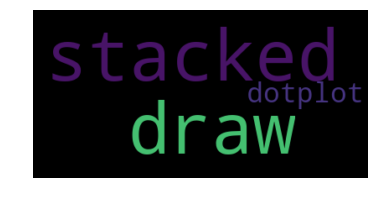

In [48]:
text = df.title[0]

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [57]:
STOPWORDS = set(stopwords.words('english'))
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

There are 5198054 words in the combination of all review.


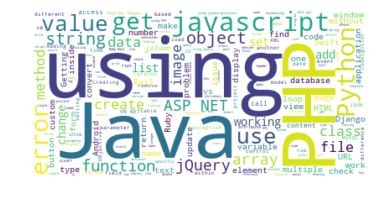

In [62]:
text = " ".join(title for title in df.title)
print("There are {} words in the combination of all review.".format(len(text)))

# Generate a word cloud image
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 5. Преобразование текстовых признаков в векторное представление 

## 5.1 Мешок слов

In [69]:
text = [title for title in df.head(10).title]

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text)

print(X.toarray())

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
  0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0]
 [1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1
  1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 2 0 1 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0
  0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1

## 5.2 TF/IDF

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))
features = tfidf.fit_transform(text)
pd.DataFrame(
    features.todense(),
    columns=tfidf.get_feature_names()
)

,from,how,how to,in,is,mysql
0,0.000000,0.529358,0.529358,0.662993,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.707107,0.707107
2,0.000000,0.707107,0.707107,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.707107,0.707107,0.000000,0.000000,0.000000
6,0.603976,0.421900,0.421900,0.528407,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.579682,0.404930,0.404930,0.000000,0.000000,0.579682


## 5.3 ngrams

In [80]:
import re
from nltk.util import ngrams

s = text[1].lower()
s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
tokens = [token for token in s.split(" ") if token != ""]
output = list(ngrams(tokens, 3))
output

[('mysql', 'select', 'all'),
 ('select', 'all', 'records'),
 ('all', 'records', 'where'),
 ('records', 'where', 'a'),
 ('where', 'a', 'datetime'),
 ('a', 'datetime', 'field'),
 ('datetime', 'field', 'is'),
 ('field', 'is', 'less'),
 ('is', 'less', 'than'),
 ('less', 'than', 'a'),
 ('than', 'a', 'specified'),
 ('a', 'specified', 'value')]

## 6. Gensim

In [87]:
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec

In [88]:
path = get_tmpfile("word2vec.model")

In [89]:
model = Word2Vec(common_texts, size=100, window=5, min_count=1, workers=4)

In [90]:
model.save("word2vec.model")

In [92]:
model = Word2Vec.load("word2vec.model")
model.train([["hello", "world"]], total_examples=1, epochs=2)
# (0, 2)

0

In [94]:
vector = model.wv['computer']
vector

array([ 3.6967946e-03,  4.1794013e-03, -2.7028339e-03, -5.1143259e-04,
        3.0808731e-03, -4.8979197e-04,  1.2560349e-05,  2.3190689e-03,
       -2.7447662e-03, -2.8982139e-03, -3.0180889e-03,  8.8777923e-04,
       -3.5401390e-04,  4.6222322e-03, -8.6906897e-05, -1.9532493e-03,
        1.0357514e-03, -3.2199116e-03,  3.9898865e-03,  2.6373747e-03,
        8.1769953e-04, -4.0972051e-03,  3.4256647e-03, -6.0639420e-04,
       -3.4955649e-03,  1.8535424e-03,  2.4277251e-03, -6.3614134e-04,
       -3.3424820e-03,  9.4353373e-04, -1.9413521e-04,  4.9754572e-03,
        3.8421659e-03, -2.3771240e-03, -3.3404154e-03, -4.7216797e-03,
        2.6431778e-03,  2.4278031e-04, -2.2103724e-03,  4.4773254e-03,
       -2.5990179e-03,  2.0819216e-03, -3.4458630e-03, -3.2298719e-03,
       -2.5814022e-03,  1.8454915e-03, -4.8006070e-03,  1.5082853e-03,
       -1.9053628e-03, -9.1906992e-04, -2.8490982e-04,  7.5545232e-04,
        7.0709892e-04,  2.8589920e-03,  3.9241556e-03,  3.3226833e-03,
      